# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import os
from zipfile import ZipFile
from datetime import datetime
import seaborn as sns
import random

# Import data

In [3]:
os.listdir("../../DATA_SET/")

['DATA_LAB', 'ab_data.zip']

In [4]:
path = "../../DATA_SET/ab_data.zip"
with ZipFile(path, 'r') as zip:
    zip.printdir()

File Name                                             Modified             Size
ab_data.csv                                    2020-08-03 19:50:04     15901933


In [5]:
with ZipFile(path, "r") as zip:
    with zip.open("ab_data.csv") as f:
        data = pd.read_csv(f)

In [6]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


* user_id - unique identifier for each user
* timestamp - associated date and time for each visit to the website by a given user
* group - the category a user was grouped into pre-A/B test (control or treatment groups)
* landing_page - the page that was displayed to a user when they visited the company website (new_page or old_page)
* converted - whether a user converted or not (0 or 1) NB: Users in the control group ought to be displayed the old page, while those in the treatment group ought to see the new page.

In [7]:
data.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

# Date time

In [8]:
data["timestamp"] = data["timestamp"].apply(lambda x: x.split(".")[0])

In [9]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48,control,old_page,0
1,804228,2017-01-12 08:01:45,control,old_page,0
2,661590,2017-01-11 16:55:06,treatment,new_page,0
3,853541,2017-01-08 18:28:03,treatment,new_page,0
4,864975,2017-01-21 01:52:26,control,old_page,1


In [10]:
data["timestamp"] = data["timestamp"].apply(lambda x:
                                            datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour*60+
                                            datetime.strptime(x,'%Y-%m-%d %H:%M:%S').minute
                                            )

In [11]:
data = data.rename(columns={"timestamp":"timestamp_min"})

In [12]:
data.head()

,user_id,timestamp_min,group,landing_page,converted
0,851104,1331,control,old_page,0
1,804228,481,control,old_page,0
2,661590,1015,treatment,new_page,0
3,853541,1108,treatment,new_page,0
4,864975,112,control,old_page,1


# Select columns

In [13]:
data = data.loc[:,["timestamp_min","group"]]

# Box plot

<AxesSubplot:xlabel='group', ylabel='timestamp_min'>

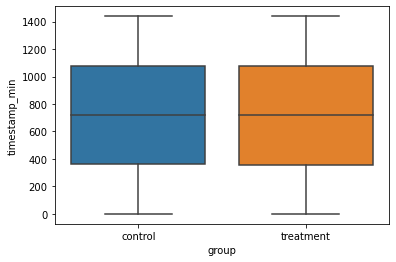

In [14]:
sns.boxplot(data=data, y="timestamp_min", x="group")

In [39]:
control   =  data.loc[data["group"]=="control","timestamp_min"]
treatment =  data.loc[data["group"]=="treatment", "timestamp_min"]
control.mean() - treatment.mean()

0.3156075056346026

In [40]:
len(control), len(treatment)

(147202, 147276)

# Resampling

In [74]:
def perm_fun(x, nA, nB): 
    n = nA + nB 
    idx_B = set(random.sample(range(n), nB)) 
    idx_A = set(range(n)) - idx_B 
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [75]:
perm_fun(data.timestamp_min,len(control),len(treatment))

2.1095381592267586

In [76]:
perm_diffs = [perm_fun(data.timestamp_min, len(control), len(treatment)) for _ in range(1000)]

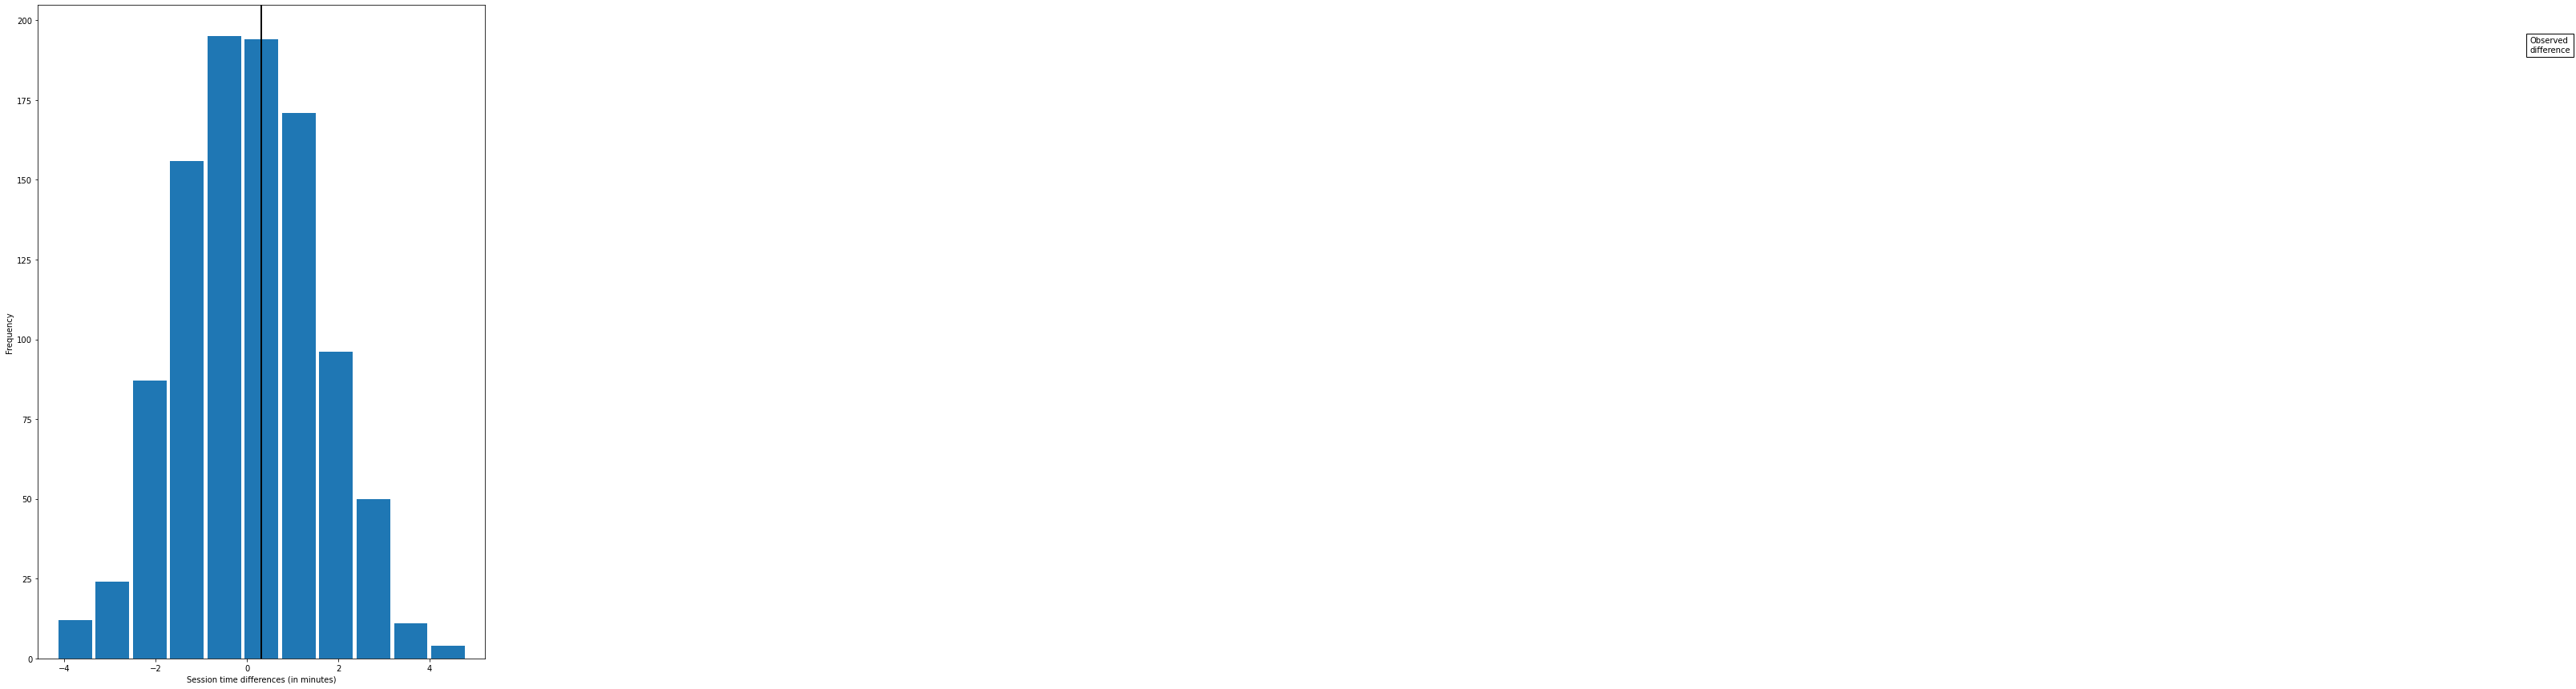

In [90]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 15)) 
ax.hist(perm_diffs, bins=11, rwidth=0.9) 
ax.axvline(x = control.mean() - treatment.mean(), color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in minutes)')
ax.set_ylabel('Frequency')
plt.show()

In [100]:
np.mean(np.array(perm_diffs) > control.mean() - treatment.mean())

0.422

shows that mean difference of random permutations often exceeds the observed difference in session times (the vertical line), this happend $42.2\%$ of the cases